In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':float, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [3]:
sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
sales = sales.sort(['sqft_living','price'])

In [7]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name] = feature ** power
    return poly_dataframe

In [14]:
poly2_data = polynomial_dataframe(sales['sqft_living'],2)

In [15]:
poly2_data.shape

(21613, 2)

In [16]:
sales['sqft_living'].head()

19452    290
15381    370
860      380
18379    384
4868     390
Name: sqft_living, dtype: float64

In [17]:
poly1_data.head()

,power_1,power_2
19452,290,84100
15381,370,136900
860,380,144400
18379,384,147456
4868,390,152100


In [18]:
from sklearn import linear_model

In [24]:
regr = linear_model.LinearRegression()

In [25]:
poly1_data = polynomial_dataframe(sales['sqft_living'],1)
X_train = poly1_data
y_train = sales['price'].values
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
# The coefficients
print('Coefficients: \n', regr.coef_)
print ('Intercept: ', regr.intercept_)

('Coefficients: \n', array([ 280.6235679]))
('Intercept: ', -43580.743094475241)


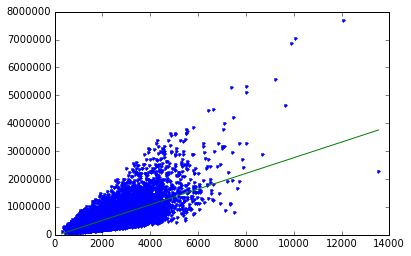

In [28]:
plt.plot(poly1_data['power_1'],sales['price'],'.',
        poly1_data['power_1'], regr.predict(poly1_data),'-')

In [40]:
regr = linear_model.LinearRegression()

In [54]:
poly2_data = polynomial_dataframe(sales['sqft_living'],2)

In [55]:
X_train = poly2_data
y_train = sales['price'].values

In [56]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [57]:
# The coefficients
print('Coefficients: \n', regr.coef_)
print ('Intercept: ', regr.intercept_)

('Coefficients: \n', array([  6.79940947e+01,   3.85812609e-02]))
('Intercept: ', 199222.27930548223)


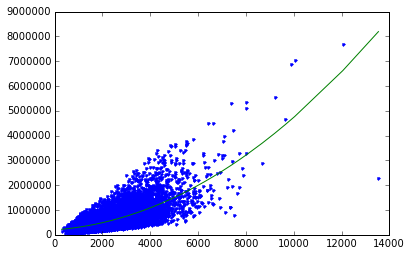

In [58]:
plt.plot(poly2_data['power_1'],sales['price'],'.',
        poly2_data['power_1'], regr.predict(poly2_data),'-')

In [59]:
poly3_data = polynomial_dataframe(sales['sqft_living'],3)

X_train = poly3_data
y_train = sales['price'].values

regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
print ('Intercept: ', regr.intercept_)

('Coefficients: \n', array([ -9.01819864e+01,   8.70465089e-02,  -3.84055260e-06]))
('Intercept: ', 336819.7482208194)


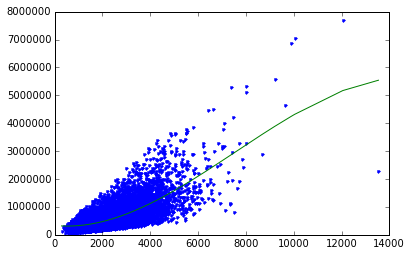

In [60]:
plt.plot(poly3_data['power_1'],sales['price'],'.',
        poly3_data['power_1'], regr.predict(poly3_data),'-')

In [61]:
poly15_data = polynomial_dataframe(sales['sqft_living'],15)

X_train = poly15_data
y_train = sales['price'].values

regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
print ('Intercept: ', regr.intercept_)

('Coefficients: \n', array([  4.56404164e-91,   1.42712173e-50,   7.68159926e-56,
         5.37872327e-60,   1.04545560e-74,   2.68575522e-71,
         2.26147568e-67,   1.85900299e-63,   1.47144116e-59,
         1.09771012e-55,   7.43509038e-52,   4.23015578e-48,
         1.61618577e-44,  -2.49283826e-48,   9.59718336e-53]))
('Intercept: ', 537116.32963775063)


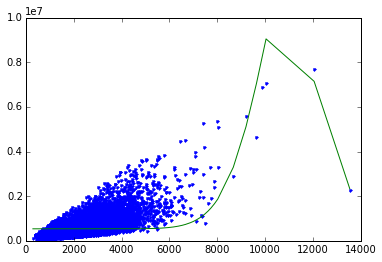

In [62]:
plt.plot(poly15_data['power_1'],sales['price'],'.',
        poly15_data['power_1'], regr.predict(poly15_data),'-')

In [64]:
# Ridge regression 
# L2 penalty - start with very small lambda as if no lambda, but should lead to more stable solution
l2_small_penalty = 1e-5

In [65]:
X_train = poly15_data
y_train = sales['price']
ridge_regr = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
ridge_regr.fit(X_train, y_train)

Ridge(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, solver='auto', tol=0.001)

In [67]:
# The coefficients
print('Coefficients: \n', ridge_regr.coef_)
print ('Intercept: ', ridge_regr.intercept_)

('Coefficients: \n', array([  1.74425503e+02,  -7.83644074e-02,   3.73280427e-05,
        -2.85554311e-09,  -2.37487557e-13,   9.70529709e-18,
         1.77791834e-21,   9.76993158e-26,   7.78897289e-31,
        -3.83833667e-34,  -4.52940095e-38,  -3.16694117e-42,
        -1.24102475e-46,   4.53456467e-51,   1.63425896e-54]))
('Intercept: ', 194587.10584429518)


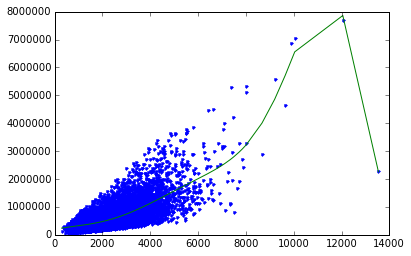

In [68]:
plt.plot(poly15_data['power_1'],sales['price'],'.',
        poly15_data['power_1'], ridge_regr.predict(poly15_data),'-')

In [69]:
# Model with different subsets
# dtype_dict same as above
set_1 = pd.read_csv('wk3_kc_house_set_1_data.csv', dtype=dtype_dict)
set_2 = pd.read_csv('wk3_kc_house_set_2_data.csv', dtype=dtype_dict)
set_3 = pd.read_csv('wk3_kc_house_set_3_data.csv', dtype=dtype_dict)
set_4 = pd.read_csv('wk3_kc_house_set_4_data.csv', dtype=dtype_dict)

In [71]:
# Set 1
poly15_data = polynomial_dataframe(set_1['sqft_living'],15)

X_train = poly15_data
y_train = set_1['price'].values

regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
print ('Intercept: ', regr.intercept_)

('Coefficients: \n', array([  3.05794168e-90,   2.21229718e-49,   6.14919047e-55,
         3.70645715e-60,  -1.76896679e-74,   1.10358334e-70,
         8.37724029e-67,   6.23411957e-63,   4.49156442e-59,
         3.06938763e-55,   1.91749300e-51,   1.01335180e-47,
         3.62176959e-44,  -5.63501661e-48,   2.18641116e-52]))
('Intercept: ', 539058.8186685848)


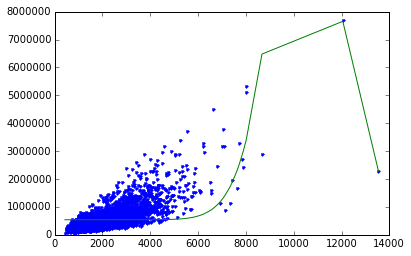

In [72]:
plt.plot(poly15_data['power_1'],set_1['price'],'.',
        poly15_data['power_1'], regr.predict(poly15_data),'-')

In [73]:
# Set 2
poly15_data = polynomial_dataframe(set_2['sqft_living'],15)

X_train = poly15_data
y_train = set_2['price'].values

regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
print ('Intercept: ', regr.intercept_)

('Coefficients: \n', array([  2.68007730e-77,  -1.28315451e-39,   2.29856318e-45,
         3.90813500e-49,   2.27126043e-53,  -8.03782665e-57,
         3.62841089e-55,   1.49807480e-51,   5.73974428e-48,
         1.95158330e-44,   5.37897035e-41,   9.38035527e-38,
        -3.62478309e-41,   4.63968356e-45,  -1.96500469e-49]))
('Intercept: ', 506806.16930118739)


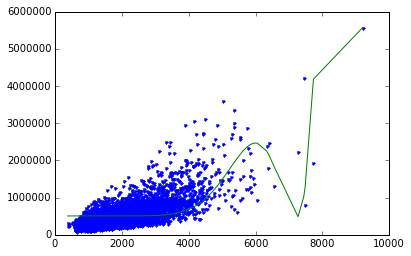

In [74]:
plt.plot(poly15_data['power_1'],set_2['price'],'.',
        poly15_data['power_1'], regr.predict(poly15_data),'-')

In [75]:
# Set 3
poly15_data = polynomial_dataframe(set_3['sqft_living'],15)

X_train = poly15_data
y_train = set_3['price'].values

regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
print ('Intercept: ', regr.intercept_)

('Coefficients: \n', array([  2.83751934e-88,   1.17220384e-48,   1.05176250e-55,
         1.55068038e-59,   1.64169385e-72,   4.27894908e-69,
         2.68009626e-65,   1.63911362e-61,   9.66435015e-58,
         5.38044653e-54,   2.72563636e-50,   1.16253248e-46,
         3.33756141e-43,  -6.76238818e-47,   3.43132932e-51]))
('Intercept: ', 530874.31665334816)


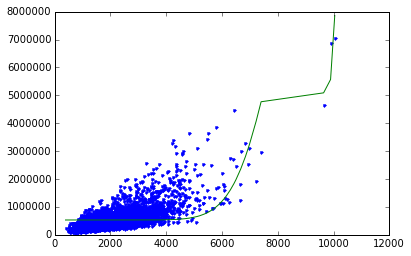

In [76]:
plt.plot(poly15_data['power_1'],set_3['price'],'.',
        poly15_data['power_1'], regr.predict(poly15_data),'-')

In [77]:
# Set 4
poly15_data = polynomial_dataframe(set_4['sqft_living'],15)

X_train = poly15_data
y_train = set_4['price'].values

regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
print ('Intercept: ', regr.intercept_)

('Coefficients: \n', array([  1.37062038e-76,  -7.34880850e-40,  -4.26691045e-44,
        -3.79757873e-49,  -1.08322540e-53,   2.33358797e-57,
         1.27051232e-54,   4.87799087e-51,   1.73524692e-47,
         5.46982656e-44,   1.39568453e-40,   2.25011157e-37,
        -9.43820714e-41,   1.31553951e-44,  -6.09071716e-49]))
('Intercept: ', 494803.63427859615)


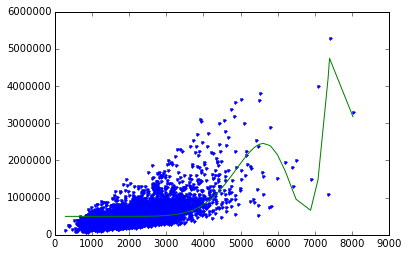

In [78]:
plt.plot(poly15_data['power_1'],set_4['price'],'.',
        poly15_data['power_1'], regr.predict(poly15_data),'-')

In [100]:
# L2 penalty - start with very small lambda as if no lambda, but should lead to more stable solution
#l2_small_penalty = 1e-5
l2_small_penalty = 1.23e2

In [101]:
# Ridge regression with small L2 penalty
# Set 1
poly15_data = polynomial_dataframe(set_1['sqft_living'],15)

X_train = poly15_data
y_train = set_1['price']
ridge_regr = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
ridge_regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', ridge_regr.coef_)
print ('Intercept: ', ridge_regr.intercept_)

('Coefficients: \n', array([  2.32806803e+00,   3.53621608e-04,   3.31969692e-08,
         2.00082477e-12,   1.11492559e-16,   6.57786122e-21,
         4.12939525e-25,   2.70393755e-29,   1.81614763e-33,
         1.23824277e-37,   8.51872481e-42,   5.89455598e-46,
         4.09542560e-50,   2.85464889e-54,   1.99547476e-58]))
('Intercept: ', 539103.03105779539)


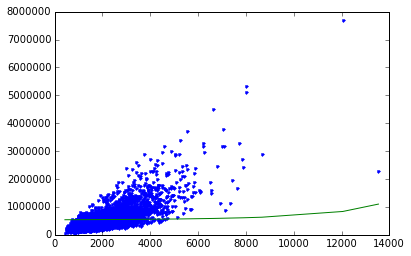

In [102]:
plt.plot(poly15_data['power_1'],set_1['price'],'.',
        poly15_data['power_1'], ridge_regr.predict(poly15_data),'-')

In [103]:
# Ridge regression with small L2 penalty
# Set 2
poly15_data = polynomial_dataframe(set_2['sqft_living'],15)

X_train = poly15_data
y_train = set_2['price']
ridge_regr = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
ridge_regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', ridge_regr.coef_)
print ('Intercept: ', ridge_regr.intercept_)

('Coefficients: \n', array([  2.09756903e+00,   3.90817483e-04,   6.67189944e-08,
         8.90002997e-12,   9.72639877e-16,   9.69733682e-20,
         9.50564475e-24,   9.44491031e-28,   9.57191338e-32,
         9.86945155e-36,   1.03101115e-39,   1.08729784e-43,
         1.15453748e-47,   1.23211305e-51,   1.31986696e-55]))
('Intercept: ', 529853.02535779774)


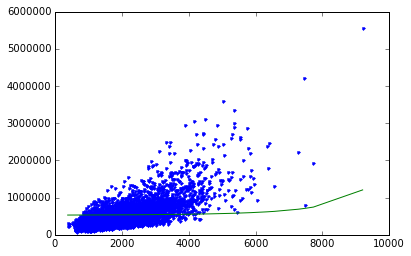

In [104]:
plt.plot(poly15_data['power_1'],set_2['price'],'.',
        poly15_data['power_1'], ridge_regr.predict(poly15_data),'-')

In [105]:
# Ridge regression with small L2 penalty
# Set 3
poly15_data = polynomial_dataframe(set_3['sqft_living'],15)

X_train = poly15_data
y_train = set_3['price']
ridge_regr = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
ridge_regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', ridge_regr.coef_)
print ('Intercept: ', ridge_regr.intercept_)

('Coefficients: \n', array([  2.28906258e+00,   4.12472190e-04,   6.08835345e-08,
         6.58572163e-12,   6.15278155e-16,   5.64446634e-20,
         5.28834396e-24,   5.07091402e-28,   4.94657273e-32,
         4.88043809e-36,   4.85009106e-40,   4.84161534e-44,
         4.84635021e-48,   4.85883628e-52,   4.87558469e-56]))
('Intercept: ', 533640.11409744318)


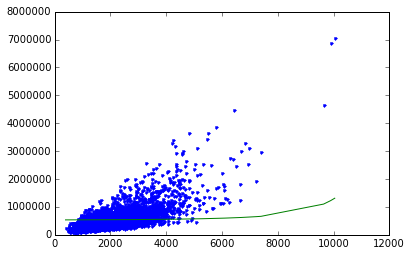

In [106]:
plt.plot(poly15_data['power_1'],set_3['price'],'.',
        poly15_data['power_1'], ridge_regr.predict(poly15_data),'-')

In [107]:
# Ridge regression with small L2 penalty
# Set 4
poly15_data = polynomial_dataframe(set_4['sqft_living'],15)

X_train = poly15_data
y_train = set_4['price']
ridge_regr = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
ridge_regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', ridge_regr.coef_)
print ('Intercept: ', ridge_regr.intercept_)

('Coefficients: \n', array([  2.08596194e+00,   4.05035772e-04,   7.46864647e-08,
         1.13096608e-11,   1.45864442e-15,   1.73561251e-19,
         2.01609632e-23,   2.34605255e-27,   2.75636073e-31,
         3.27043069e-35,   3.91046855e-39,   4.70118041e-43,
         5.67212304e-47,   6.85958087e-51,   8.30843630e-55]))
('Intercept: ', 524562.96904668317)


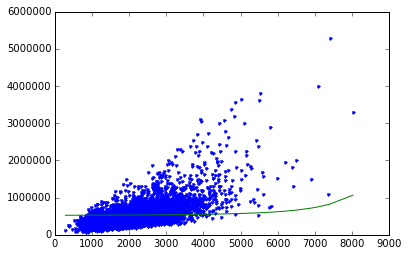

In [108]:
plt.plot(poly15_data['power_1'],set_4['price'],'.',
        poly15_data['power_1'], ridge_regr.predict(poly15_data),'-')